In [17]:
from sklearn.externals import joblib
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

In [11]:
clf = joblib.load('./OneVsRestClassifier.pkl')
model = load_model('./resnet50_model.h5')

/home/popmusic/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


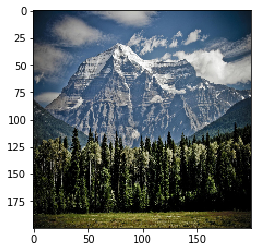

In [12]:
img_path = '../test_images/4.jpg'
img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)
plt.show()

In [18]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)

In [23]:
predicts = clf.predict(features.reshape(features.shape[0], 2048))
predicts

array([[0, 1, 0, 0, 1]])

In [24]:
class_labels = ['desert', 'mounts', 'sea', 'sunset', 'trees']
[class_labels[i] for i in range(len(class_labels)) if predicts[0][i] == 1]

['mounts', 'trees']